In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('/Users/kaiyang/desktop/employeedata.csv')
df.head()

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


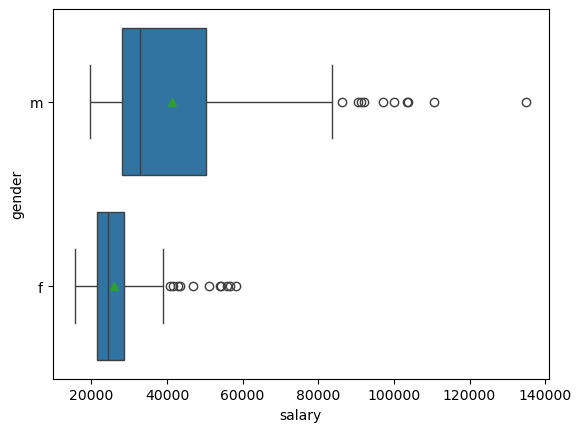

In [70]:
#ensure Seaborn is loaded
import seaborn as sns

sns.boxplot(x=df['salary'], y=df['gender'], showmeans=True);

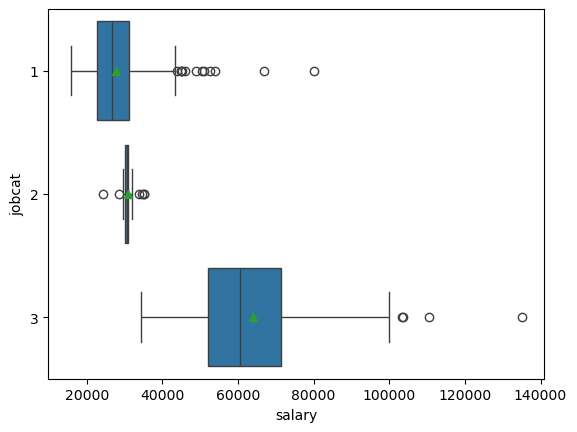

In [76]:
sns.boxplot(x=df['salary'], y=df['jobcat'].astype('category'), showmeans=True);

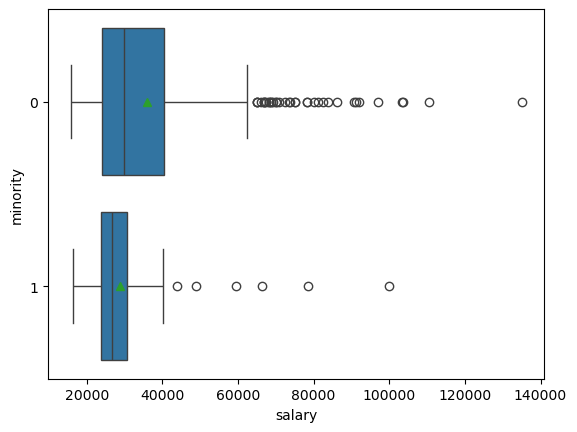

In [78]:
sns.boxplot(x=df['salary'], y=df['minority'].astype('category'), showmeans=True);

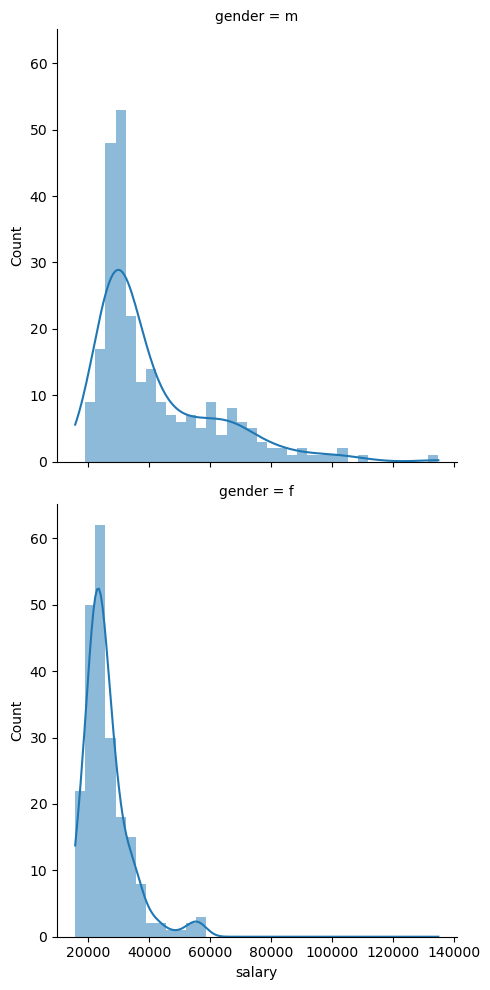

In [80]:
sns.displot(x='salary', row='gender', data=df, linewidth=0, kde=True);

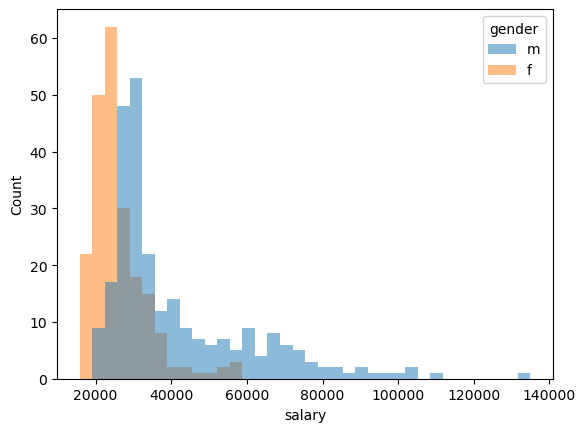

In [82]:
sns.histplot(x='salary', hue='gender', data=df, linewidth=0);

/var/folders/rr/q2hphpp53sg6tswwk64tz_tw0000gn/T/ipykernel_34992/2156210996.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='salary', hue='gender', data=df, shade=True);


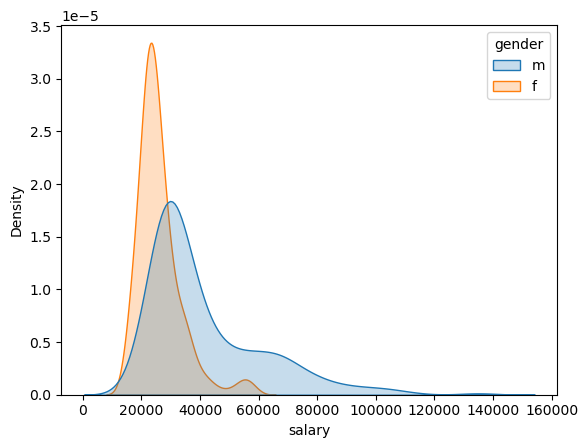

In [84]:
sns.kdeplot(x='salary', hue='gender', data=df, shade=True);

In [86]:
female_sal = df[df['gender'] == "f"]['salary']
male_sal = df[df['gender'] == "m"]['salary']

In [88]:
female_sal

2      21450
3      21900
7      21900
8      27900
9      24000
       ...  
466    32850
467    55750
468    25200
472    21450
473    29400
Name: salary, Length: 216, dtype: int64

In [90]:
# ensure the scipy stats module is loaded
from scipy import stats 
stats.levene(female_sal, male_sal)

LeveneResult(statistic=51.60251563589033, pvalue=2.6656140787811717e-12)

In [92]:
import statsmodels.stats.api as sms

In [ ]:
model = sms.CompareMeans.from_data(df[df['gender'] == "f"]['salary'], df[df['gender'] == "m"]['salary'])
model.summary( usevar='unequal')